In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
dataset = pd.read_csv("wine.csv")
dataset.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
dataset.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
dataset.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

Accuracy : 0.9722222222222222
[[ 8  0  0]
 [ 1 20  0]
 [ 0  0  7]]


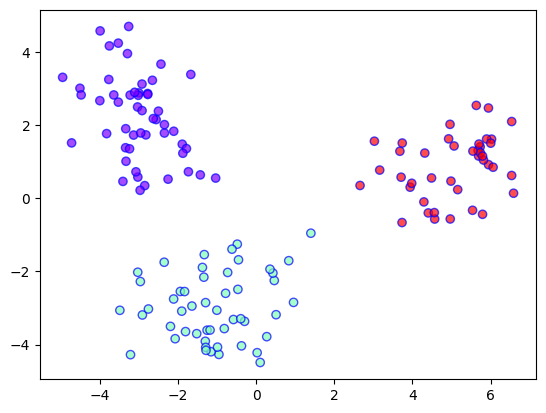

In [6]:
X = dataset.drop("Wine",axis=1)
y = dataset["Wine"]

sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

[[ 8  0  0]
 [ 1 20  0]
 [ 0  0  7]]


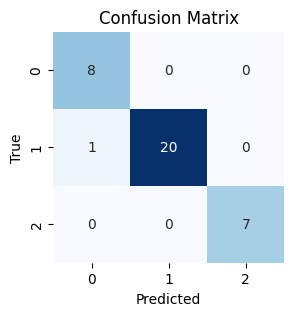

In [7]:
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

plt.figure(figsize=(3,3))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

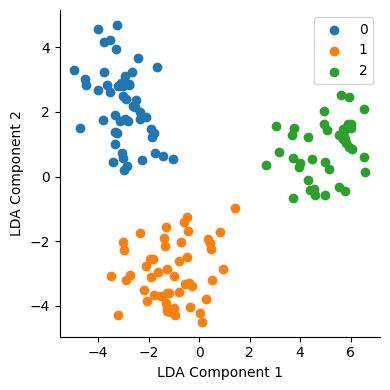

In [8]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['Class']=y_train
sns.FacetGrid(tmp_Df, hue ="Class", height = 4).map(plt.scatter,'LDA Component 1','LDA Component 2')
plt.legend(loc='upper right')

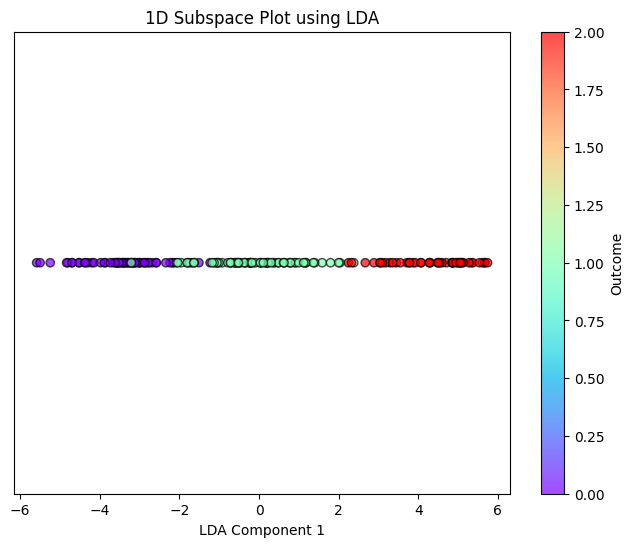

Class means in the LDA subspace:
[[ 0.91919498 -0.29234227  0.32560449 -0.73799712  0.4632262   0.87336224
   0.95688391 -0.57898505  0.54038332  0.20340098  0.45884745  0.77135086
   1.17450054]
 [-0.89171997 -0.36236171 -0.44495778  0.22313708 -0.36456713 -0.05806709
   0.05177999  0.01456883  0.069002   -0.85279882  0.43361057  0.24529431
  -0.72410998]
 [ 0.18915862  0.89533073  0.25794454  0.57706453 -0.03012665 -0.98761685
  -1.25276105  0.6901194  -0.76628663  1.01141787 -1.20538229 -1.31094994
  -0.37257757]]
Explained variance ratio (only for n_components > 1): [0.68747889]


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt 
import numpy as np

lda=LinearDiscriminantAnalysis(n_components=1) 
X_lda=lda.fit_transform(X, y)

plt.figure(figsize=(8, 6)) 
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='rainbow', alpha=0.7, edgecolors='k') 
plt.title('1D Subspace Plot using LDA') 
plt.xlabel('LDA Component 1') 
plt.yticks([]) 
plt.colorbar(label='Outcome') 
plt.show() 
print("Class means in the LDA subspace:") 
print(lda.means_) 
print("Explained variance ratio (only for n_components > 1):", lda.explained_variance_ratio_)

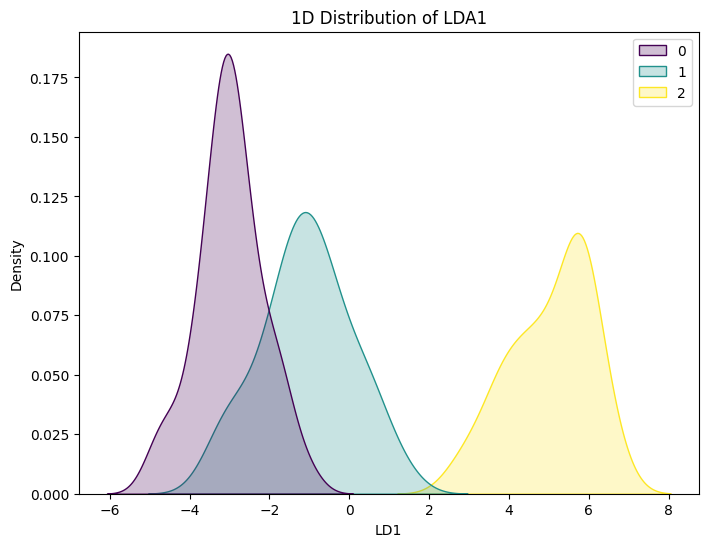

In [10]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=X_train[:, 0], hue=y_train, fill=True, palette="viridis")
plt.title('1D Distribution of LDA1')
plt.xlabel('LD1')
plt.ylabel('Density')
plt.show()

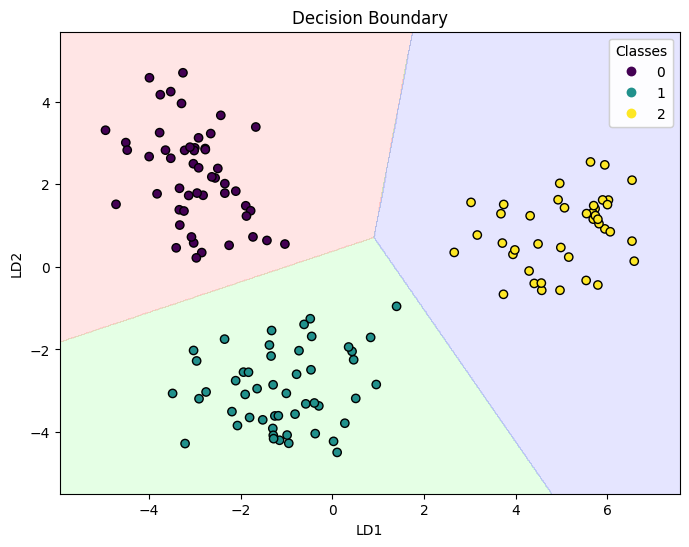

In [11]:
from matplotlib.colors import ListedColormap
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o')

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Decision Boundary')

legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.gca().add_artist(legend1)

plt.show()